In [1]:
%matplotlib inline

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/teddy/keras/venv/lib/python3.6/site-packages/tenso

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
from keras.utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels, 46)
y_test = to_categorical(test_labels, 46)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train[1000:], y_train[1000:],
                    epochs=10, batch_size=128,
                    validation_data=(x_train[:1000],y_train[:1000]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 103us/step - loss: 0.0546 - accuracy: 0.9857 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 2/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.0309 - accuracy: 0.9916 - val_loss: 0.0324 - val_accuracy: 0.9909
Epoch 3/10
7982/7982 [==============================] - 0s 57us/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0298 - val_accuracy: 0.9919
Epoch 4/10
7982/7982 [==============================] - 0s 57us/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0295 - val_accuracy: 0.9919
Epoch 5/10
7982/7982 [==============================] - 0s 60us/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0306 - val_accuracy: 0.9923
Epoch 6/10
7982/7982 [==============================] - 0s 58us/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0305 - val_acc

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

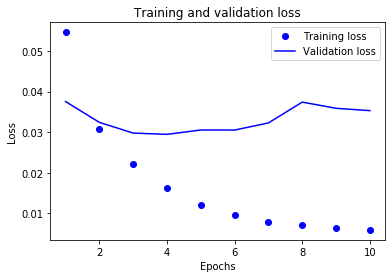

In [9]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

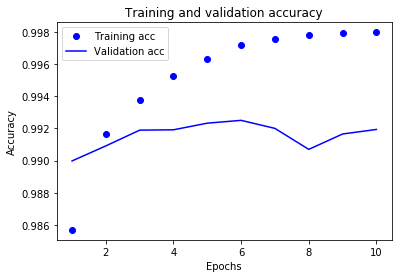

In [10]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()